In [1]:
#import required libraries 
import numpy as np 
import cv2
from matplotlib import pyplot as plt

In [2]:
# function to display image
def imshow(img, figsize=(5, 5)):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.axis('off')
    ax.imshow(img)

In [3]:
# image reading functions
"""
    input:  - reference_image_path
            - template_image_path
    output: - 2 array of images 
"""
def read_image(reference_image_path, template_image_path): 
    image = cv2.imread(reference_image_path)
    template = cv2.imread(template_image_path)
    return image, template

Show image


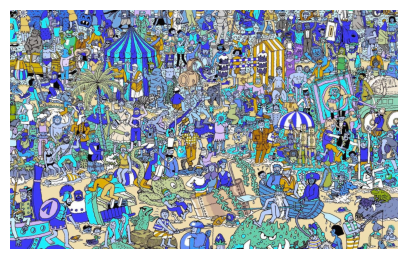

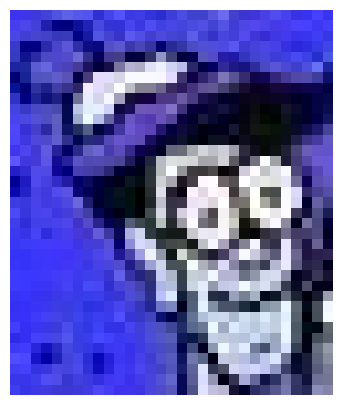

In [4]:
reference_image_path = "../data_input/where_is_waldo.jpg"
template_image_path = "../data_input/template1.png"
reference_image, template_image = read_image(reference_image_path, template_image_path)
print("Show image")
imshow(reference_image)
imshow(template_image)

In [5]:
# function: compute SSD for each pixel 
"""
    input:  - window: local patch
            - template: template image
    output: - ssd value of pixel
"""
def calculate_SSD(window, template):
    ssd = np.sum((window - template) ** 2)
    return ssd

In [6]:
# function: compute SSD for thw whole image
def compute_SSD(reference_image, template_image):
    # height, width of refernce image and template_image 
    height_ref, width_ref, _ = reference_image.shape
    height_temp, width_temp, _ = template_image.shape
    
    # create a matrix to storage ssd result 
    ssd_result = np.zeros((height_ref-height_temp, width_ref-width_temp))

    # compute SSD for each pixel 
    for i in range(height_ref - height_temp): 
        for j in range(width_ref - width_temp): 
            window = reference_image[i:i+height_temp, j:j+width_temp]
            ssd = calculate_SSD(window, template_image)
            ssd_result[i, j] = ssd
    return ssd_result

In [7]:
def find_location_of_waldo(matrix_result, reference_image, template_image): 
    # Find location minimum 
    min_ssd = np.min(matrix_result)
    min_ssd_index = np.argwhere(matrix_result == min_ssd)[0]
    print("Min value of ssd: ", min_ssd)
    print("Location of ssd min value: ", min_ssd_index)
    
    # Draw a rectangle surrounding the waldo
    cv2.rectangle(reference_image, (min_ssd_index[1], min_ssd_index[0]), (min_ssd_index[1] + template_image.shape[1], 
                                                                          min_ssd_index[0] + template_image.shape[0]), (255,0,0), 5)
    return reference_image

In [8]:
def find_waldo(): 
    # read images
    reference_image_path = "../data_input/where_is_waldo.jpg"
    template_image_path = "../data_input/template1.png"
    reference_image, template_image = read_image(reference_image_path, template_image_path)
    print("Show image")
    imshow(reference_image)
    imshow(template_image)
    # compute ssd matrix
    ssd_matrix = compute_SSD(reference_image, template_image)
    print("Display SSD for the Whole Image:: ", ssd_matrix)
    result = find_location_of_waldo(ssd_matrix, reference_image, template_image)
    print("Display result")
    imshow(result)
    cv2.imwrite("../data_output/Waldo_good_image.jpg", result)

Show image
Display SSD for the Whole Image::  [[365083. 363007. 364775. ... 366630. 368696. 367141.]
 [369842. 363411. 362711. ... 368173. 371514. 357173.]
 [364263. 357207. 362505. ... 361299. 369628. 366648.]
 ...
 [325574. 337094. 334454. ... 365883. 362922. 366755.]
 [327210. 328456. 329839. ... 364343. 365260. 369687.]
 [327557. 330552. 334805. ... 365076. 360568. 360719.]]
Min value of ssd:  0.0
Location of ssd min value:  [  74 1258]
Display result


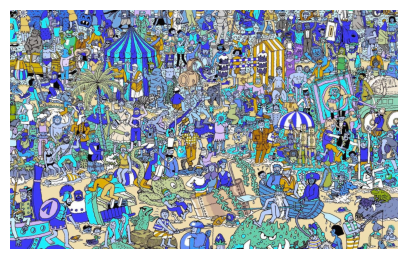

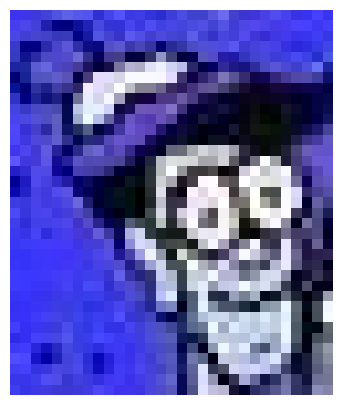

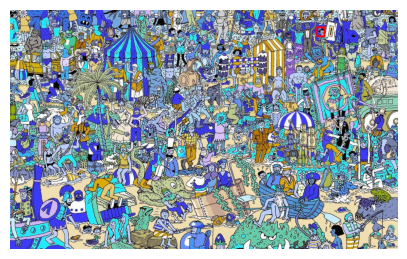

In [9]:
find_waldo()

In [11]:
# Repeat the above process with the noisy template (template2.png)
def find_waldo_with_noisy_template(): 
    # read images
    reference_image_path = "../data_input/where_is_waldo.jpg"
    template_image_path = "../data_input/template2.png"
    reference_image_1, template_image_1 = read_image(reference_image_path, template_image_path)
    print("Show image")
    imshow(reference_image_1)
    imshow(template_image_1)
    # compute ssd matrix
    ssd_matrix_1 = compute_SSD(reference_image_1, template_image_1)
    print("Display SSD for the Whole Image:: ", ssd_matrix_1)
    result_1 = find_location_of_waldo(ssd_matrix_1, reference_image_1, template_image_1)
    print("Display result")
    imshow(result_1)
    cv2.imwrite("../data_output/waldo_with_noisy_image.jpg", result_1)
    

Show image
Display SSD for the Whole Image::  [[362179. 355669. 357733. ... 369170. 370826. 361353.]
 [362020. 363243. 355099. ... 368085. 364700. 367067.]
 [361141. 363997. 354329. ... 365579. 358068. 355676.]
 ...
 [350282. 346134. 351652. ... 360229. 364372. 368865.]
 [355006. 350954. 350049. ... 368855. 360954. 368039.]
 [351407. 350110. 350101. ... 367374. 369670. 364431.]]
Min value of ssd:  302768.0
Location of ssd min value:  [  74 1258]
Display result


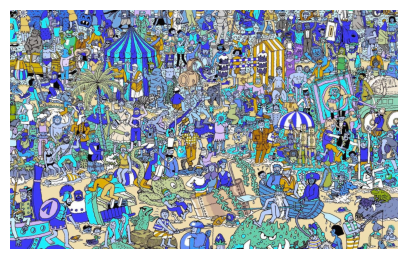

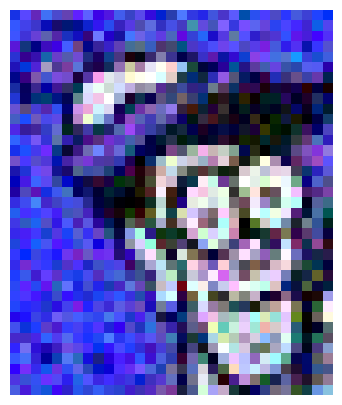

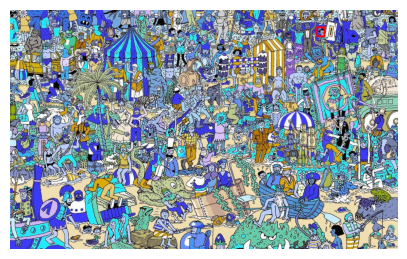

In [12]:
find_waldo_with_noisy_template()